#### Students:
#### 3045616 - Diana Niccolò 
#### 3040302 - Gazzaneo Rocco 
#### 3145491 - Migliorini Giosuè

### Computational Statistics - Phd Statistics & Computer Science 

# DESCRIPTION OF THE ALGORITHM

# **SMC<sup>2</sup>**

### **State Space Models**
Suppose we know the simultaneous equations: \
$$ X_0 = K_0(U_0, θ) $$
$$ X_t = K_t(X_{t-1}, U_t, \theta) $$
$$ Y_t = H_t(X_t, V_t, \theta)$$

Where $\{U_t\}, \{V_t\}$ are i.i.d. random noise variables.

\
We want to make inference on θ by obtaining a sample from its posterior. 
\
The posterior of interest takes the form: \
$$P_T(dθ|Y_{0:T} = y_{0:T}) = \frac{p_T^{\theta}(y_{0:T})}{p_T(y_{0:T})}ν(dθ) $$
where $ν(dθ)$ is our prior. 


Introducing the state variables $X_{0:T}$, we can obtain the joint conditional:
$$ P_T(dθ,dx_{0:T}|Y_{0:T} = y_{0:T}) = \frac{1}{p_T(y_{0:T})}ν(dθ) P_T^{\theta}(dx_{0:T}) \prod^T_{t=0} f_t^θ(y_t|x_t)$$


Notice that:
$$p^θ(y) = ∫_\chi P^{\theta}(dx) f^θ(y|x)$$


### **SMC for intractable likelihood**

SMC samplers approximate draws from a distribution 

$$P_t(d\theta) = \frac{γ_t(\theta)}{L_t} \nu(d\theta)$$

By linking $P_t(d\theta)$ and $P_{t-1}(d\theta)$ through

$$
\begin{aligned}
P_t(d\theta_t) &= \frac{L_{t-1}}{L_t}\frac{γ_t(\theta)}{γ_{t-1}(\theta)} P_{t-1}(d\theta_{t}) \\
&= \frac{L_{t-1}}{L_t}\frac{γ_t(\theta)}{γ_{t-1}(\theta)} \int_{\theta_{t-1} \in \Theta}P_{t-1}(d\theta_{t-1})M_t(\theta_{t-1},d\theta_t)
\end{aligned}$$

Clearly, this is possible provided that 3 conditions are satisfied:
1. We can sample from $\nu(d\theta)$
2. We can evaluate $γ_t(\theta)/γ_{t-1}(\theta)$
3. We have MCMC kernels $M_t(\theta_{t-1},d\theta_t)$ leaving invariant $P_t(d\theta)$

But what if conditon 2 is not satisfied? Notice that in SSM this quantity corresponds to: $$p_t^{\theta}(y_{0:t})/p_{t-1}^{\theta}(y_{0:t}) = p_t^{\theta}(y_t|y_{0:t-1})$$

We can solve the problem if we introduce an auxiliary variable $Z \sim M^θ(dz)$ having joint density $γ_t(\theta, z)$ s.t.
$$ \int \gamma_t(\theta,z) M^\theta(dz) = \gamma_t(\theta) $$

Then, our model becomes:
$$ P_t(d\theta, dz) = \frac{γ_t(\theta,z)}{L_t} \nu(d\theta) M^\theta(dz)$$

Now we can proceed by running an SMC sampler targeting $\{P_t(dθ,dz)\}_{t\geq0}$. Notice that the requirements are satisfied: 
1. We can sample from $M^\theta(dz)$
2. We can evaluate $γ_t(\theta,z)/γ_{t-1}(\theta,z)$
3. We can resort to PMCMC to build Markov kernels leaving invariant $P_t(d\theta,dz)$

### **SMC<sup>2</sup>**
SMC<sup>2</sup> is an extension of the precedent procedure for Z being a variable changing over time, such as the unobserved states $\{X_t\}$ of a SSM. 

Recall how we described $ P_t(d\theta, dz)$. We change the notation to make it specific to the SSM and include resampling indices:
 $$ 
 \begin{aligned}
 P_t(d\theta, dz) &⟶ \pi_t(d\theta, dx_{0:t}^{1:N_x}, a_{1:t}^{1:N_x}) \\
 L_t &⟶ p_t(y_{0:t}) \\
 M^\theta_t(dz) &⟶ \psi^\theta_t(dx_{0:t}^{1:N_x}, a_{1:t}^{1:N_x}) \\
 \phi_t(\theta,z)  &⟶ L_t^{N_x}(\theta, x_{0:t}^{1:N_x}, a_{1:t}^{1:N_x})
 \end{aligned}
 $$ 

 Now the model becomes: 

 $$ \pi_t(d\theta, dx_{0:t}^{1:N_x}, a_{1:t}^{1:N_x}) = \frac{1}{p_t(y_{0:t})} \nu(d\theta) \psi^\theta_t(dx_{0:t}^{1:N_x}, a_{1:t}^{1:N_x}) L_t^{N_x}(\theta, x_{0:t}^{1:N_x}, a_{1:t}^{1:N_x})$$



The joint conditional $L_t^{N_x}(\theta, x_{0:t}^{1:N_x}, a_{1:t}^{1:N_x})$ can be interpreted as an unbiased estimate of $p^\theta_t(y_{0:t})$.


In our case the estimate is a byproduct of the particle filter, and it can be expressed as:

$$ L_t^{N_x}(\Theta, X_{0:t}^{1:N_x}, A_{1:t}^{1:N_x}) = \left( \frac{1}{N_x} \sum^{N_x}_{n=0} G_0^{\Theta_t}(X_0^{n}) \right) \prod^T_{s=1}\left( \frac{1}{N_x} \sum^{N_x}_{n=0} G_s^{\Theta_t}(X_{t-1}^{A_t^n}, X_t^n) \right)$$

Where $G^\Theta_0$ are the importance sampling weight functions, and $G^\Theta_t$ are the importance resampling weight functions with respect to our target distribution $\pi_t$.

The algorithms iterates as follows.



* Sample $N_\theta$ θ-particles from the prior $\nu(d\theta)$

For each θ-particle, perform an importance sampling step: 
* Sample independent $X_0^{1:N_x}$ from the known distribution $\psi^\theta_0(dx_{0}^{1:N_x})$. 
* Compute a weight $w_t^m$ for each θ-particle by averaging the weight function $G^{\Theta}_0$ over the $N_x$ x-particles. We obtain an estimate of $p_0^\theta(y_0)$. Normalize to get: $W^m_t=w_t^m/\sum^{N_\theta}_{l=1}w^l_0$.


For t=1,…,T:
* If $ESS(W^{1:N_\theta}_{t-1})$ is too low, resample the x-particles $(X_{0:t-1}^{1:N_x}, A_{1:t-1}^{1:N_x})$ for each θ-particle and obtain a new set of $Θ^{1:N_\theta}_t$. To do so, move the particles and the previous $Θ^{1:N_\theta}_{t-1}$ through a PMCMC kernel that is invariant w.r.t. the target $\pi_t(d\theta, dx_{0:t}^{1:N_x}, a_{1:t}^{1:N_x})$:

 $$(Θ^{m}_t, \tilde{X}_{0:t-1}^{m,1:N_x}, \tilde{A}_{1:t-1}^{m,1:N_x}) \sim K_t((Θ^{m}_{t-1}, X_{0:t-1}^{m,\:1:N_x}, A_{1:t-1}^{m,\:1:N_x}), d(\theta, x_{0:t-1}^{m,\:1:N_x}, a_{1:t-1}^{m,\:1:N_x}))\;\;\;\; \text{for}\;m=1,\dots,N_\theta$$  
 * The kernel most commonly used is Particle Marginal Metropolis-Hastings with random walk proposal, whose parameters have to be specified
 * Different resampling strategies can be implemented for the kernel
* Perform a PF iteration to get new couples of particles $(X_{t}^{1:N_x}, A_{t}^{1:N_x})$. Performing this step means sampling from a distribution:
$$ \psi^\theta_t(dx_t^{1:N_x},a_t^{1:N_x}|dx_{0:t-1}^{1:N_x},a_{0:t-1}^{1:N_x}) = \prod^{N_x}_{n=1} W_{t-1}^{a^t_n}M^\theta_{t}(x_{t-1}^{a^t_n},dx_t^n) $$
where $ W^n_{t-1}=\frac{G^{θ}_{t-1}(x_{t-2}^{a^n_{t-1}}, x_{t-1}^{n})}{\sum^{N_x}_{m=1}G^{θ}_{t-1}(x_{t-2}^{a^m_{t-1}}, x_{t-1}^{m})}$ (n.b., these weights are *not* the same as $W^{1:N_\theta}_t$) \\

* Proceed to recompute the θ-particles weights:
  * Average $G^{\Theta}_t(X_{t-1}^{A^n_{t}}, X_{t}^{n})$ over the $N_x$ x-particles, multiply with $w^m_{t-1}$ to obtain $w^m_{t}$
  * Normalize over the θ-particles to obtain $W^{1:N_\theta}_t$


### **The State Space Model**

Stochastic volatility:

\begin{align*}
X_0 & \sim N\left(\mu, \frac{\sigma^2}{1-\rho^2}\right) \\
X_t|X_{t-1}=x_{t-1} & \sim N\left( \mu + \rho (x_{t-1}-\mu), \sigma^2\right) \\
Y_t|X_t=x_t & \sim N\left(0, e^{x_t}\right)
\end{align*}

With parameters $\mu = -1,\;\rho = 0.95,\;\sigma = 0.2$

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")  

import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from numpy import random
import multiprocessing as mp
import pandas as pd
import pickle

import particles
from particles import datasets as dts
from particles import distributions as dists
from particles import resampling as rs
from particles import smc_samplers as ssp
from particles import state_space_models as ssm
from particles.collectors import Moments
from particles import multiSMC

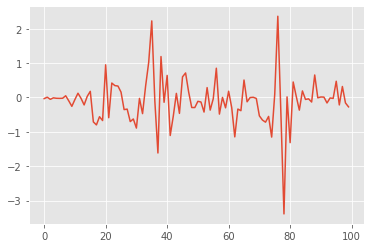

In [2]:
class StochVol(ssm.StateSpaceModel):
    default_parameters = {'mu':-1., 'rho':0.95, 'sigma': 0.2}
    def PX0(self):  # Distribution of X_0
        return dists.Normal(loc=self.mu, scale=self.sigma / np.sqrt(1. - self.rho**2))
    def PX(self, t, xp):  # Distribution of X_t given X_{t-1}=xp (p=past)
        return dists.Normal(loc=self.mu + self.rho * (xp - self.mu), scale=self.sigma)
    def PY(self, t, xp, x):  # Distribution of Y_t given X_t=x (and possibly X_{t-1}=xp)
        return dists.Normal(loc=0., scale=np.exp(x))

time=100

my_model = StochVol(mu=-1., rho=.95, sigma=.2)  # actual model
true_states, data = my_model.simulate(time)  # we simulate from the model 100 data points

plt.style.use('ggplot')
plt.figure()
plt.plot(data)

### **Prior Specification**

$\mu\sim N(0,2^2)$, $\rho \sim \mathcal{U}([-1,1])$, $\sigma \sim \mathrm{Gamma}(1, 1)$

In [3]:
prior_dict = {'mu': dists.Normal(scale=1.), 
              'rho': dists.Uniform(a=-0.999, b=0.999), 
              'sigma':dists.Gamma()}
my_prior = dists.StructDist(prior_dict)

### **Single SMC^2 run**

In [6]:
Nx = 200

fk_smc2 = ssp.SMC2(ssm_cls=ssm.StochVol, data=data, prior=my_prior, init_Nx=Nx, ar_to_increase_Nx=0.1)
alg_smc2 = particles.SMC(fk=fk_smc2,
                         N=10,
                         store_history=True)

In [ ]:
alg_smc2.run()

In [9]:
def structure_and_plot():
    mu = list(map(lambda x: x.theta['mu'], alg_smc2.hist.X))
    true_mu = ssm.StochVol().mu
    y = np.array(mu).mean(axis=1)
    x = np.arange(len(y))
    error_up = np.quantile(np.array(mu), 0.25, axis=1)
    error_down = np.quantile(np.array(mu), 0.75, axis=1)
    plt.plot(x, y, 'k-')
    plt.xlabel('Iteration')
    plt.ylabel('Mean and std of mu samples')
    plt.fill_between(x, error_down, error_up, alpha=0.3)
    plt.axhline(true_mu, label='True Value', color='r')
    plt.legend()  

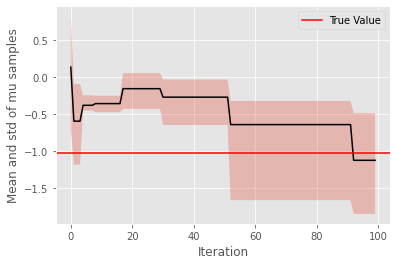

In [10]:
structure_and_plot()

Increasing the number of particles $N_{\theta}$:

In [ ]:
Nx = 200
N = 100
fk_smc2 = ssp.SMC2(ssm_cls=ssm.StochVol, data=data, prior=my_prior, init_Nx=Nx, ar_to_increase_Nx=0.1)
alg_smc2 = particles.SMC(fk=fk_smc2,
                     N=N,
                     store_history=True)
alg_smc2.run()

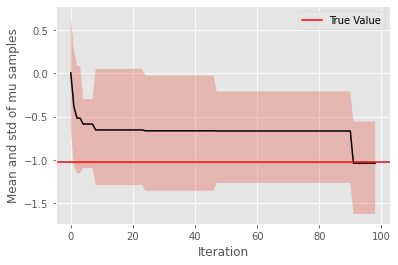

In [12]:
structure_and_plot()

We noticed that by increasing the number of particles the posterior estimate gets closer to a distribution centered at the true value. We would expect that to happen by increasing the number of observations $t$, but as $N_\theta$ grows the posterior estimates seem to have a trend of centering towards the true value of our simulated data ($\mu = -1$).

In [ ]:
mus = dict()
Nx = 200
for n in range(100, 10000, 1000):
    prior = dists.StructDist({'mu': dists.Normal(scale=10.), 'sigma': dists.Gamma()})
    fk_smc2 = ssp.SMC2(ssm_cls=ssm.StochVol, data=y, prior=prior, init_Nx=Nx, ar_to_increase_Nx=0.1)
    alg_smc2 = particles.SMC(fk=fk_smc2,
                         N=n,
                         store_history=True)
    alg_smc2.run()
    mus[n] = list(map(lambda x: x.theta['mu'], alg_smc2.hist.X))

In [13]:
with open('saved_dictionary.pkl', 'rb') as f:
    mus = pickle.load(f)

We can see that, as theta particles increase, the samples seem to be more and more drawn from the posterior distribution centered at the true value .

Text(0, 0.5, 'Sample mean of mu at last iteration')

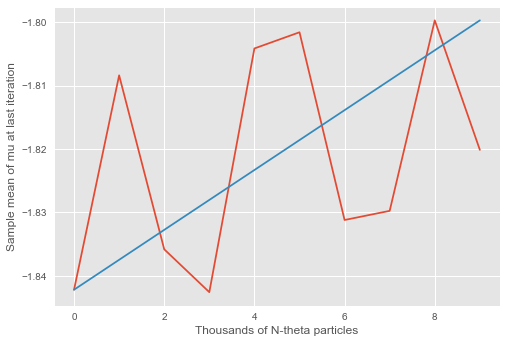

In [14]:
plt.plot(np.arange(len(mus)), list(map(lambda x : np.mean(x[-1]), mus.values())))
plt.plot(np.linspace(np.mean(list(mus.values())[0][-1]), np.mean(list(mus.values())[-2][-1]), 10))
plt.xlabel('Thousands of N-theta particles')
plt.ylabel('Sample mean of mu at last iteration')

## **Analysis on ESS - StochVol**

At this stage we would like to analyze what is the behavior of the Estimated Sample size as the iteration increase. ESS has a wiggly behavior, in fact it increases drastically in value every time resampling occurs.

In [51]:
T = 700
my_model = StochVol(mu=-1., rho=.95, sigma=.2)  # actual model
true_states, data = my_model.simulate(T)
fk_smc2 = ssp.SMC2(ssm_cls=ssm.StochVol, data=data, prior=my_prior, init_Nx=Nx, ar_to_increase_Nx=0.1)
alg_smc2 = particles.SMC(fk=fk_smc2,
                         N=100,
                         store_history=True)

In [45]:
alg_smc2.run()

OrderedDict([('mu', <particles.distributions.Normal object at 0x000002728730A610>), ('rho', <particles.distributions.Uniform object at 0x00000272873935B0>), ('sigma', <particles.distributions.Gamma object at 0x0000027287393730>)])


Text(0, 0.5, 'ESS')

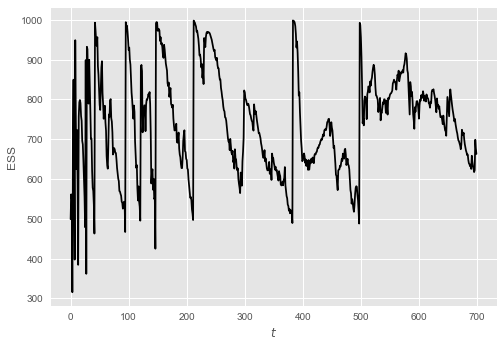

In [46]:
plt.plot(alg_smc2.summaries.ESSs, 'k')
plt.xlabel(r'$t$')
plt.ylabel('ESS')

Re-estimating the likelihood is the most computationally expensive component of SMC2. When this operation is performed at time t, it incurs an $\mathcal{O}(t * N_{θ} * Nx)$ computational cost. Therefore, to study the computational cost of SMC2 we need to investigate the rate at which ESS drops below a given threshold.

In [53]:
ESSs = np.array(alg_smc2.summaries.ESSs)
sum(ESSs < 500) / len(ESSs)

0.018571428571428572

We can now compare the rate at which ESS drops below a given threshold (A proxy for the computational cost), for different lower bounds ESS that we provide. The purpose is this to scan the hyperparameter space (ESS min) to come up with one which efficiently trades up costs

In [68]:
len(rates)

36

In [ ]:
T = 100
my_model = StochVol(mu=-1., rho=.95, sigma=.2)  # actual model
true_states, data = my_model.simulate(T)

ESSmins = np.arange(0.05, 0.35, 0.01)
rates = []
for essmin in ESSmins:
    fk_smc2 = ssp.SMC2(ssm_cls=ssm.StochVol, data=data, prior=my_prior, init_Nx=20, ar_to_increase_Nx=0.1)

    alg_smc2 = particles.SMC(fk=fk_smc2,
                             N=10,
                             ESSrmin=essmin,
                             store_history=True)
    alg_smc2.run()
    ESSs = np.array(alg_smc2.summaries.ESSs)
    rate = sum(ESSs < (100 * essmin)) / len(ESSs)
    
    rates.append(rate)

One could argue that the rate at which resampling occurs increases linearly with the ESS lower bound value that, once reached, triggers resampling

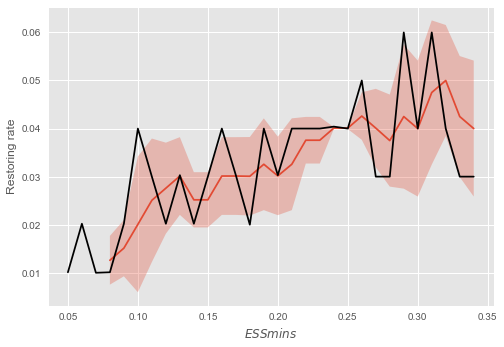

In [81]:
plt.xlabel(r'$ESSmins$')
plt.ylabel('Restoring rate')
mean = pd.Series(rates).rolling(window=4).mean()
std = pd.Series(rates).rolling(window=4).std()
plt.plot(ESSmins, mean)

plt.fill_between(ESSmins, mean-std, mean+std, alpha=0.3)
plt.plot(ESSmins, rates, 'k')


According to Proposition 2 of Chopin 2013, the ESS for Nx with $x < -\infty$ is always greater than or equal to half the ESS for x $ \rightarrow \infty$.
In our unbiased estimate from the data, the relationship holds:


In [ ]:
# First let's set Nx

Nx = 50
Ninf = int(1e4)

In [137]:
T = 100
my_model = StochVol(mu=-1., rho=.95, sigma=.2)  # actual model
true_states, data = my_model.simulate(T)

fk_smc2 = ssp.SMC2(ssm_cls=ssm.StochVol, data=data, prior=my_prior, init_Nx=Nx, ar_to_increase_Nx=0.1)

alg_smc2 = particles.SMC(fk=fk_smc2,
                             N=10,
                             ESSrmin=0.5,
                             store_history=True)
alg_smc2.run()
ESSs_Nx = np.array(alg_smc2.summaries.ESSs)

In [ ]:
fk_smc2 = ssp.SMC2(ssm_cls=ssm.StochVol, data=data, prior=my_prior, init_Nx=Ninf, ar_to_increase_Nx=0.1)

alg_smc2 = particles.SMC(fk=fk_smc2,
                             N=10,
                             ESSrmin=0.5,
                             store_history=True)
alg_smc2.run()
ESSs_Ninf = np.array(alg_smc2.summaries.ESSs) * 1/2

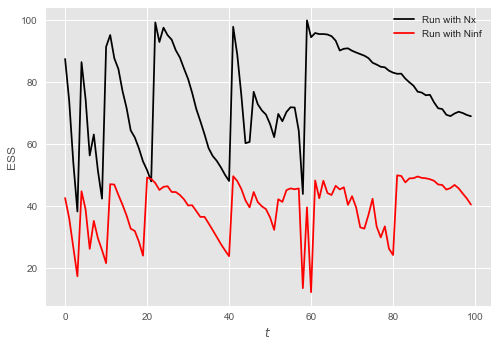

In [139]:
plt.plot(ESSs_Nx , 'k', label='Run with Nx')
plt.plot(ESSs_Ninf , 'r', label='Run with Ninf')
plt.xlabel(r'$t$')
plt.ylabel('ESS')
plt.legend()

## **Resampling schemes**
Let's now compare the resampling rate in different resampling schemes

In [6]:
T = 100
Nx = 100
my_model = ssm.StochVol(mu=-1., rho=.95, sigma=.2)  # actual model
true_states, data = my_model.simulate(T)

In [8]:
prior_dict = {'mu': dists.Normal(scale=1.), 
              'rho': dists.Uniform(a=-0.999, b=0.999), 
              'sigma':dists.Gamma()}
my_prior = dists.StructDist(prior_dict)

In [9]:
fk_smc2 = ssp.SMC2(ssm_cls=ssm.StochVol, data=data, prior=my_prior, init_Nx=Nx, ar_to_increase_Nx=0.1)


In [12]:
max_cpu = mp.cpu_count()

resamplings = ['multinomial', 'residual', 'stratified', 'systematic', 'ssp']
rates_list = []

for res in resamplings:

    alg_smc2 = multiSMC(fk=fk_smc2, 
                        N=10,
                        nruns=50, 
                        nprocs=max_cpu, 
                        resampling = res, 
                        ESSrmin = 0.5,
                        store_history=True) 
    
    rates = list(map(lambda x: sum(np.array(x['output'].summaries.ESSs) < 50) / len(x['output'].summaries.ESSs), alg_smc2))
    
    rates_list.append(rates)

All of the resampling methods seem to have the same mean resampling rate but different variances, with the least variance for the systematic method

Text(0.5, 0, 'Resampling Rate')

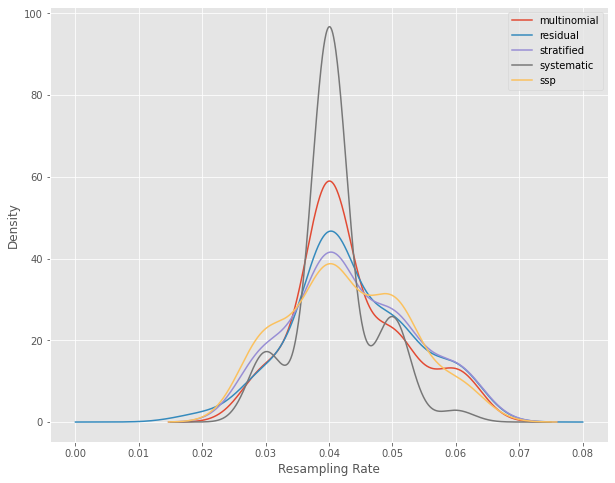

In [33]:
plt.style.use('ggplot')
pd.DataFrame(rates_list).T.rename(columns=dict(zip(range(5), resamplings))).plot.kde(figsize=(10, 8))
plt.xlabel('Resampling Rate')

Variance of resampling rate for the different resampling schemes

<AxesSubplot:>

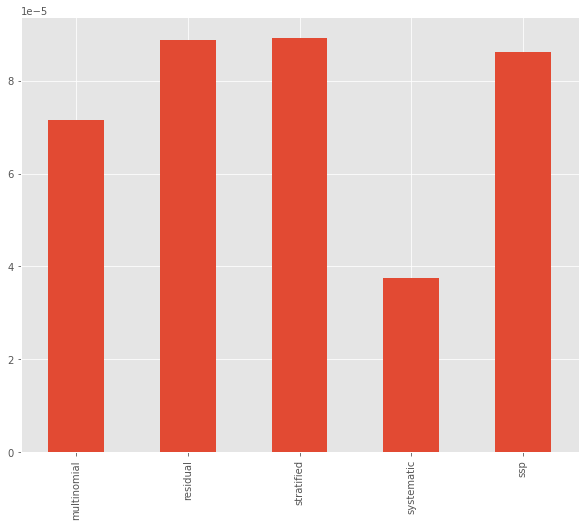

In [34]:
plt.style.use('ggplot')

pd.DataFrame(rates_list).T.rename(columns=dict(zip(range(5), resamplings))).var(axis=0).plot.bar(figsize=(10, 8))

### Convergence for different resampling techniques
We show next that the distributions to which the algorithm converges for parameter $\mu$ is centered at the same value regardless of the resampling scheme.

In [107]:
x, data = ssm.StochVol().simulate(100)
prior_dict = {'mu': dists.Normal(loc=-.5, scale=1.), 
              'rho': dists.Uniform(a=-0.999, b=0.999), 
              'sigma':dists.Gamma()}
my_prior = dists.StructDist(prior_dict)
Nx = 100

fk_smc2 = ssp.SMC2(ssm_cls=ssm.StochVol, data=data, prior=my_prior, init_Nx=Nx, ar_to_increase_Nx=0.1)
resamplings = ['stratified', 'ssp', 'systematic']
algs_smc2 = multiSMC(fk=fk_smc2, 
                        N=10, #**kwargs
                        nruns=20, 
                        nprocs=2, #Use all cpus 
                        resampling = resamplings, #Select all resampling techniques
                        store_history=True) #**kwargs

In [108]:
strat_kdens_mu = []
ssp_kdens_mu = []
syst_kdens_mu = []

def store_resamplings():
    for alg in algs_smc2:
        resampling_type = alg['resampling']

        if resampling_type == 'systematic':
            syst_kdens_mu.append(alg['output'].__dict__['X'].__dict__['theta']['mu'])

        elif resampling_type == 'ssp':
            ssp_kdens_mu.append(alg['output'].__dict__['X'].__dict__['theta']['mu'])

        elif resampling_type == 'stratified':
            strat_kdens_mu.append(alg['output'].__dict__['X'].__dict__['theta']['mu'])
store_resamplings()

In [133]:
plt.style.use('seaborn')
plt.figure()

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

The following plots shows the posterior density for the paramater $\mu$ generated by different runs of SMC^2. The red line indicates the true value while the blue is the mean of the means of $ \mu $ across runs.

#### *stratified* resampling

Mean over iterations of the parameter mu: -1.2579593253116355


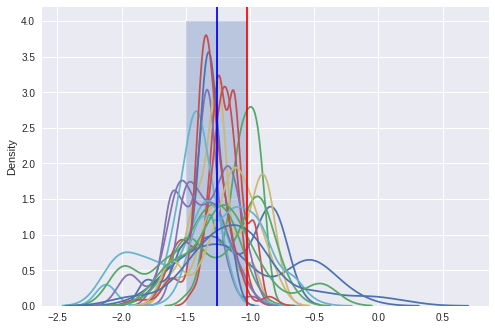

In [134]:
for kd in strat_kdens_mu:
    sns.kdeplot(kd)

inferred_mu = np.mean([np.mean(i) for i in strat_kdens_mu])
error = np.mean([np.std(i) for i in strat_kdens_mu])
plt.fill_between(np.linspace(inferred_mu-error, inferred_mu+error, 50), +4, 0, alpha=0.3)

true_mu = ssm.StochVol().mu
plt.axvline(true_mu, label='True Value', color='r')
plt.axvline(inferred_mu, label='Inferred Value', color='b')

print(f'Mean over iterations of the parameter mu: {inferred_mu}')

#### *systematic* resampling

Mean over iterations of the parameter mu: -1.2804825842570156


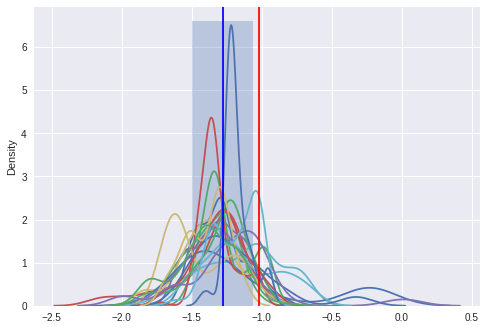

In [142]:
for kd in syst_kdens_mu:
    sns.kdeplot(kd)
inferred_mu = np.mean([np.mean(i) for i in syst_kdens_mu])

error = np.mean([np.std(i) for i in syst_kdens_mu])
plt.fill_between(np.linspace(inferred_mu-error, inferred_mu+error, 50), +6.6, 0, alpha=0.3)

true_mu = ssm.StochVol().mu
plt.axvline(true_mu, label='True Value', color='r')
plt.axvline(inferred_mu, label='Inferred Value', color='b')
print(f'Mean over iterations of the parameter mu: {np.mean([np.mean(i) for i in syst_kdens_mu])}')

#### *SSP* resampling

Mean over iterations of the parameter mu: -1.2592472649622686


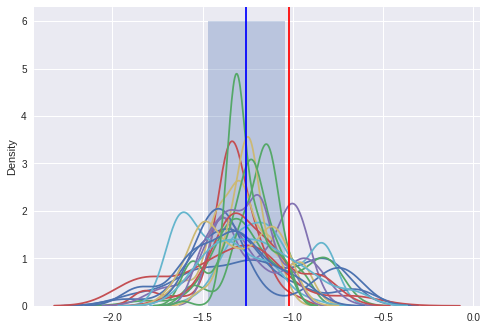

In [141]:
for kd in ssp_kdens_mu:
    sns.kdeplot(kd)
inferred_mu = np.mean([np.mean(i) for i in ssp_kdens_mu])

error = np.mean([np.std(i) for i in ssp_kdens_mu])
plt.fill_between(np.linspace(inferred_mu-error, inferred_mu+error, 50), +6, 0, alpha=0.3)

true_mu = ssm.StochVol().mu
plt.axvline(true_mu, label='True Value', color='r')
plt.axvline(inferred_mu, label='Inferred Value', color='b')

print(f'Mean over iterations of the parameter mu: {np.mean([np.mean(i) for i in ssp_kdens_mu])}')

### **CPU time**

In [ ]:
T = 1000
Nx = 1000
my_model = ssm.StochVol(mu=-1., rho=.95, sigma=.2)  # actual model
true_states, data = my_model.simulate(T)

prior_dict = {'mu': dists.Normal(scale=1.), 
              'rho': dists.Uniform(a=-0.999, b=0.999), 
              'sigma':dists.Gamma()}
my_prior = dists.StructDist(prior_dict)

fk_smc2 = ssp.SMC2(ssm_cls=ssm.StochVol, data=data, prior=my_prior, init_Nx=Nx, ar_to_increase_Nx=0.1)


In [ ]:
import multiprocessing as mp
from particles import multiSMC
max_cpu = mp.cpu_count()

resamplings = ['multinomial', 'residual', 'stratified', 'systematic', 'ssp']
rates_list = []

algs_smc2 = multiSMC(fk=fk_smc2, 
                        N=100, #**kwargs
                        nruns=5, 
                        resampling = resamplings, #Select all resampling techniques
                        store_history=True) #**kwargs

In [ ]:
mean_cpu_times = {}
for res in resamplings:
    avg_time = np.mean([alg["output"].__dict__["cpu_time"] for alg in algs_smc2 if alg['resampling'] == res])
    variance = np.var([alg["output"].__dict__["cpu_time"] for alg in algs_smc2 if alg['resampling'] == res])
    mean_cpu_times[res] = {
        "avg_time": avg_time,
        "variance": variance
        }

Text(0, 0.5, 'Average CPU times over iterations')

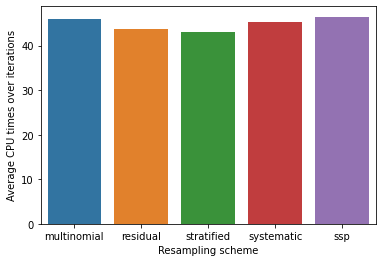

In [ ]:
resamplings = list(mean_cpu_times.keys())
average_times = [mean_cpu_times[i]['avg_time'] for i in mean_cpu_times]
stdevs = [mean_cpu_times[i]['variance'] for i in mean_cpu_times]
sb.barplot(x = resamplings, y=average_times)
plt.xlabel('Resampling scheme')
plt.ylabel('Average CPU times over iterations')

### Discussion of the Resampling results
 All the algorithms seems to converge to the same posterior distribution for our parameter of interest $\mu$. When we take into account the average CPU time for each algorithm to run, we can notice that there is not that much of a difference.

## **Steps Count State Space Model**

At this stage, the objective is to introduce a new state space model and test the machinery on this new custom application

### **The State Space Model**

StepsCount model:

\begin{align*}
X_0 & \sim N\left(\mu, \frac{\sigma}{\sqrt{1-\rho^2}}\right) \\
X_t|X_{t-1}=x_{t-1} & \sim N\left( \mu + \rho (x_{t-1}-\mu), \sigma\right) \\
Y_t|X_t=x_t & \sim N\left(x_t,e^{\tau + \phi t}\right)
\end{align*}


The peculiarity of this model is that the variance of $Y_t$ grows linearly in time, proportionally to a parameter $ \phi $. A possible application of such a model would be for a device that monitors a process $X_t$ and that produces measurements $Y_t$ with error growing in time because of weariness of the technology.
&nbsp;

Consider the following scenario: $X_{t}$ is the true total number of steps that individual takes on day $t$. Observed as a stochastic process, with different reasonable assumptions about an individual, it is a quantity with mean $\mu$, correlated with the number of steps that the same person took the previous day via $\rho$, plus a heterogeneous noise (the desire to move on that particular day) with standard deviatio $\sigma$. $Y_t$ is the measurement (with noise) that our device produces. Since it is a technological device that becomes defective over time, the estimate of the steps will result in the true number (latent $X_{t}$) plus a measurement noise $V_{t}$ that increases linearly in $t$.

In [2]:
class StepsCount(ssm.StochVol):
    default_params = {'mu': 1000, 'rho': 0.5, 'sigma': 40, 'tau':2, 'phi':.02}

    def PY(self, t, xp, x):
        return dists.Normal(loc=x,scale=np.exp(self.tau + self.phi*t))

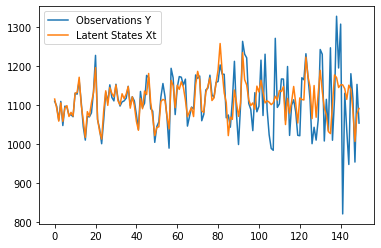

In [3]:
# data
T=150
my_params = {'mu': 1111, 'rho': 0.5, 'sigma': 40, 'tau':2, 'phi':.02}
my_model = StepsCount(mu=1111, rho=.5, sigma=40, tau=2, phi=0.02) 
true_states, data = my_model.simulate(T) 

plt.plot(data, label='Observations Y')
plt.plot(true_states, label='Latent States Xt')
plt.legend()

# Kernel parameters

We show next some convergence results for different choices of the parameters defining the kernel in the importance resampling step.
The implementations we compared are SMC versus SQMC, and Waste-free versus Adaptive MCMC. Empirical density and CDF estimates are displayed, as well as a plot of the learning trajectory through at time $t$, and a box plot of the distribution of the log-likelihood for each comparison.

## SMC vs SQMC

In [5]:
# prior
prior_dict = {'mu': dists.Normal(loc = 1100, scale=30), 
              'rho': dists.Uniform(a=-0.999, b=0.999), 
              'sigma':dists.Gamma(42, 1),
              'tau':dists.Gamma(2, 1),
              'phi': dists.Gamma(2, 13)}
prior = dists.StructDist(prior_dict)

# moment function
def qtiles(W, x):
    alphas = np.linspace(0.05, 0.95, 19)
    return rs.wquantiles_str_array(W, x.theta, alphas=alphas)

# algorithms
N = 10 ** 2
fks = {}
fk_opts = {'ssm_cls': StepsCount, 'prior': prior,
           'data': data, 'init_Nx': 50, 'smc_options': {'qmc': False},  
           'ar_to_increase_Nx': 0.1, 'wastefree': False, 'len_chain': 6} 
fks['smc2'] = ssp.SMC2(**fk_opts)
fk_opts['smc_options']['qmc'] = True
fks['smc2_qmc'] = ssp.SMC2(**fk_opts)

In [6]:
# runs
runs = particles.multiSMC(fk=fks, N=N, collect=[Moments(mom_func=qtiles)],
                          verbose=True, store_history=True, nprocs=0, nruns=10)


### Marginal posterior empirical density estimates
Plot a smoothed version of the posterior's empirical density, as estimated at the last iteration of each run


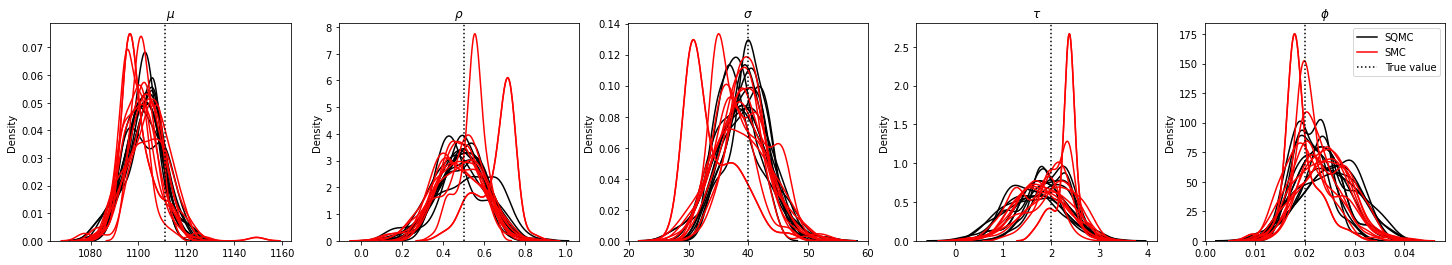

In [7]:

qmc_lthetas = [r['output'].hist.X[-1] for r in runs if r['fk']=='smc2_qmc']
smc_lthetas = [r['output'].hist.X[-1] for r in runs if r['fk']=='smc2']

for i, param in enumerate(my_params.keys()):
    plt.subplot(1,5,i+1)
    for j, q in enumerate(qmc_lthetas):
        q = np.array(q.theta[param])
        if j==0:
            sb.distplot(q,10,hist=False,color='k', label = 'SQMC')
            pass
        sb.distplot(q,10,hist=False,color='k')
    for j, p in enumerate(smc_lthetas):
        p = np.array(p.theta[param])
        if j==0:
            sb.distplot(p,10,hist=False,color='red', label = 'SMC')
            pass
        sb.distplot(p,10,hist=False,color='red')
    plt.axvline(my_params[param], color='k', ls=":", label = 'True value')
    plt.title(r'$\%s$' %param)
plt.gcf().set_size_inches(25, 4)
plt.legend()

### CDF of the marginal posterior estimates
Plot of the CDFs at the last time iteration T


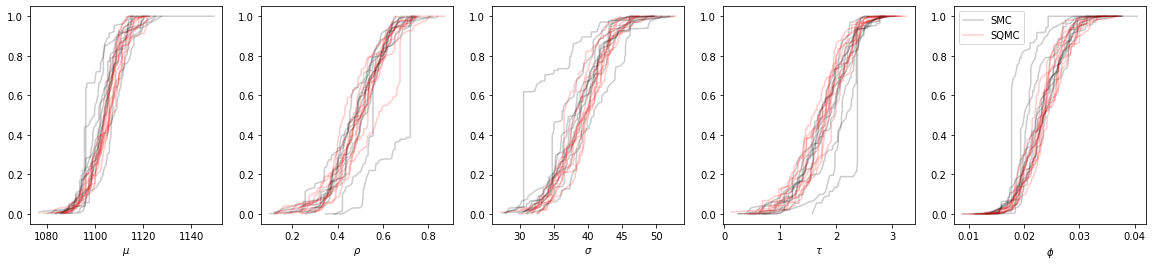

In [8]:

def cdf(x, w):
    a = np.argsort(x)
    cw = np.cumsum(w[a])
    return x[a], cw

for i, p in enumerate(my_params.keys()):
    plt.subplot(1, 5, i + 1)
    for r in runs:
        xx, yy = cdf(r['output'].X.theta[p], r['output'].W)
        if r['fk']=='smc2':
            plt.plot(xx, yy, color='black', alpha=0.2, label = 'SMC')
        else:
            plt.plot(xx, yy, color='red', alpha=0.2, label = 'SQMC')
    plt.xlabel(r'$\%s$' % p)
plt.gcf().set_size_inches(20, 4)
plt.legend(['SMC','SQMC'])
plt.show()


### Parameter inference trajectory for the two algorithms

Plotting median and interquartile range across iterations, for one run of each type

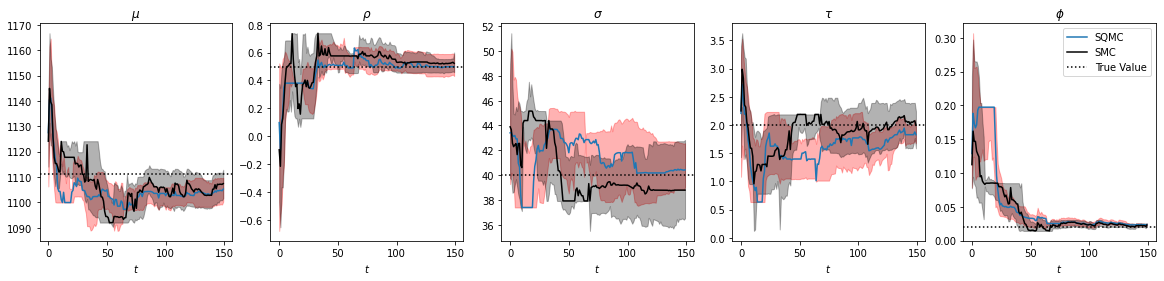

In [11]:

qmc_run = [r for r in runs if r['fk']=='smc2_qmc'][1]['output']
smc_run = [r for r in runs if r['fk']=='smc2'][1]['output']
plt.figure()
for i, p in enumerate(my_params.keys()):
    plt.subplot(1,5, i + 1)
    q25, q50, q75 = [[qmc_run.summaries.moments[t][p][j] for t in range(T)]
                for j in [5, 10, 15]]
    
    p25, p50, p75 = [[smc_run.summaries.moments[t][p][j] for t in range(T)]
                for j in [5, 10, 15]]
    plt.plot(range(T), q50, label = 'SQMC')
    plt.plot(range(T), p50,'k', label = 'SMC')
    plt.fill_between(range(T), q25, q75, color='red',alpha=0.3)
    plt.fill_between(range(T), p25, p75, color='black',alpha=0.3)
    plt.title(r'$\%s$' % p)
    plt.xlabel(r'$t$')
    plt.axhline(my_params[p], label='True Value', color='k', ls=":")
plt.gcf().set_size_inches(20, 4)
plt.legend()
plt.show()

### Box plot of log-likelihood
SQMC clearly produces lower-variance estimates

<AxesSubplot:>

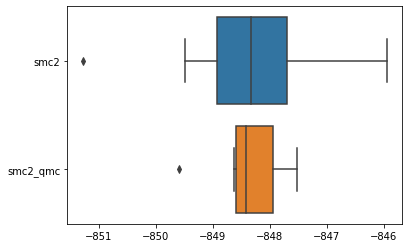

In [10]:
sb.boxplot(x=[r['output'].logLt for r in runs], y=[r['fk'] for r in runs])

## Waste free vs Adaptive MCMC

In [12]:
# algorithms
N = 10 ** 2
fks = {}
fk_opts = {'ssm_cls': StepsCount, 'prior': prior,
           'data': data, 'init_Nx': 50, 'smc_options': {'qmc': False}, # 'smc_options': {'qmc': True} if we want QMC in the kernel 
           'ar_to_increase_Nx': 0.1, 'wastefree': True, 'len_chain': 6} # changed wastefree to true
fks['wf'] = ssp.SMC2(**fk_opts)
fk_opts['wastefree'] = False
fks['nowf'] = ssp.SMC2(**fk_opts)

In [13]:
# runs
runs = particles.multiSMC(fk=fks, N=N, collect=[Moments(mom_func=qtiles)],
                          verbose=True, store_history=True, nprocs=0, nruns=5)

In [16]:
wf_lthetas = [r['output'].hist.X[-1] for i,r in enumerate(runs) if r['fk']=='wf']
nowf_lthetas = [r['output'].hist.X[-1] for r in runs if r['fk']=='nowf']

### Marginal posterior empirical density estimates
Plot a smoothed version of the posterior's empirical density, as estimated at the last iteration of each algorithm


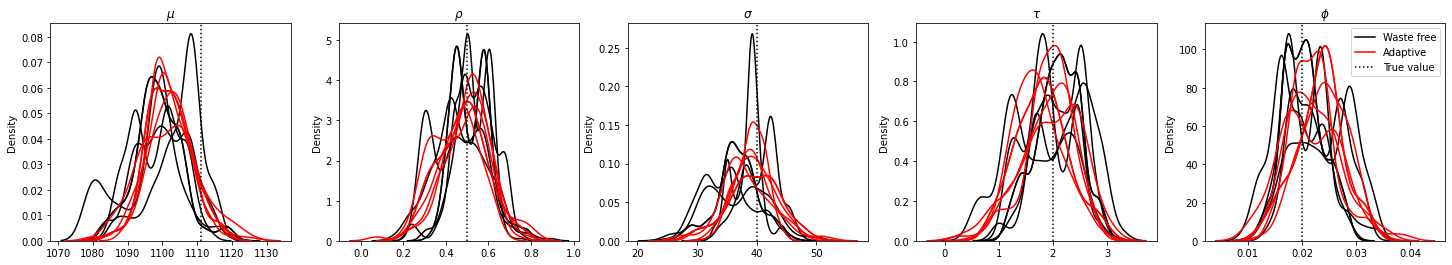

In [17]:
for i, param in enumerate(my_params.keys()):
    plt.subplot(1,5,i+1)
    for j, q in enumerate(wf_lthetas):
        q = np.array(q.theta[param])
        if j==0:
            sb.distplot(q,10,hist=False,color='k', label = 'Waste free')
            pass
        sb.distplot(q,10,hist=False,color='k')
    for j, p in enumerate(nowf_lthetas):
        p = np.array(p.theta[param])
        if j==0:
            sb.distplot(p,10,hist=False,color='red', label = 'Adaptive')
            pass
        sb.distplot(p,10,hist=False,color='red')
    plt.axvline(my_params[param], color='k', ls=":", label = 'True value')
    plt.title(r'$\%s$' %param)
plt.gcf().set_size_inches(25, 4)
plt.legend()

### CDF of the marginal posterior estimates
Plot of the CDFs at the last time iteration T


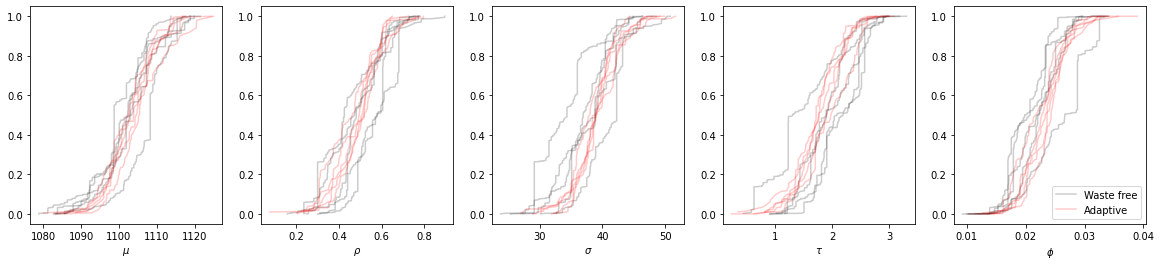

In [18]:
# plot of the CDFs

def cdf(x, w):
    a = np.argsort(x)
    cw = np.cumsum(w[a])
    return x[a], cw

for i, p in enumerate(my_params.keys()):
    plt.subplot(1, 5, i + 1)
    for r in runs:
        xx, yy = cdf(r['output'].X.theta[p], r['output'].W)
        if r['fk']=='wf':
            plt.plot(xx, yy, color='black', alpha=0.2, label = 'Waste free')
        else:
            plt.plot(xx, yy, color='red', alpha=0.2, label = 'Adaptive')
    plt.xlabel(r'$\%s$' % p)
plt.gcf().set_size_inches(20, 4)
plt.legend(['Waste free', 'Adaptive'])
plt.show()

### Parameter inference trajectory for the two algorithms

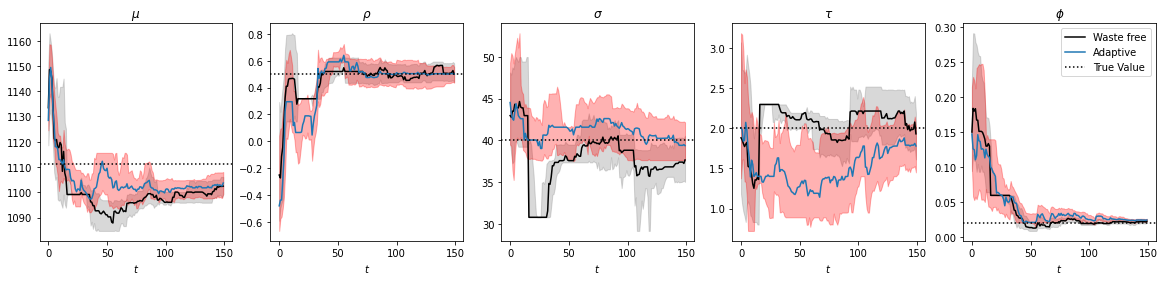

In [19]:
# Plot sequential inference trajectory for the two algorithms

wf_run = [r for r in runs if r['fk']=='wf'][0]['output']
nowf_run = [r for r in runs if r['fk']=='nowf'][0]['output']

plt.figure()
for i, p in enumerate(my_params.keys()):
    plt.subplot(1,5, i + 1)
    q25, q50, q75 = [[wf_run.summaries.moments[t][p][j] for t in range(T)]
                for j in [5, 10, 15]]
    p25, p50, p75 = [[nowf_run.summaries.moments[t][p][j] for t in range(T)]
                for j in [5, 10, 15]]
    plt.plot(range(T), q50,'k', label = 'Waste free')
    plt.plot(range(T), p50, label = 'Adaptive')
    plt.fill_between(range(T), q25, q75, color='grey',alpha=0.3)
    plt.fill_between(range(T), p25, p75, color='red',alpha=0.3)
    plt.title(r'$\%s$' % p)
    plt.xlabel(r'$t$')
    plt.axhline(my_params[p], label='True Value', color='k', ls=":")
plt.gcf().set_size_inches(20, 4)
plt.legend()
plt.show()

### Box plot of log-likelihood

<AxesSubplot:>

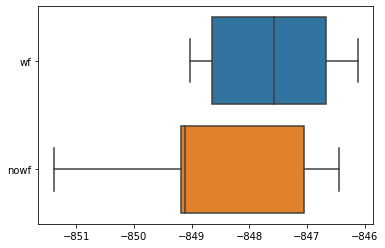

In [20]:
sb.boxplot(x=[r['output'].logLt for r in runs], y=[r['fk'] for r in runs])

### **Analysis on ESS**

At this stage the idea is to repeat the ESS analysis adopted on the StochVol to the custom made Step Model.

In [23]:
my_model = StepsCount(mu=1111, rho=.5, sigma=40, tau=2, phi=0.02) 
true_states, data = my_model.simulate(700)  # we simulate from the model 100 data points

prior_dict = {'mu': dists.Normal(loc = 1100, scale=30), 
              'rho': dists.Uniform(a=-0.999, b=0.999), 
              'sigma':dists.Gamma(42, 1),
              'tau':dists.Gamma(2, 1),
              'phi': dists.Gamma(2, 13)}
my_prior = dists.StructDist(prior_dict)


Nx = 200

fk_smc2 = ssp.SMC2(ssm_cls=StepsCount, data=data, prior=my_prior, init_Nx=Nx, ar_to_increase_Nx=0.1)

alg_smc2 = particles.SMC(fk=fk_smc2,
                         N=100,
                             ESSrmin=0.5,
                         store_history=True)

alg_smc2.run()

We realize that resampling occurs much more often at the start of the iterations and occurs less often at the very end. This might be because, as heteroskedasticity increases, the effective sample size tends to decrease less and therefore less resamplings occur.

Text(0, 0.5, 'ESS')

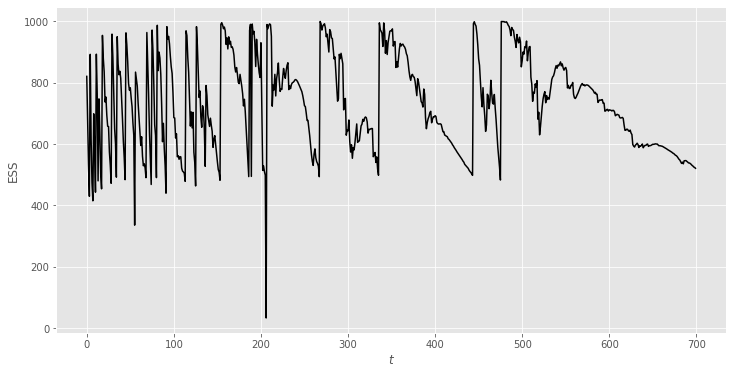

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(alg_smc2.summaries.ESSs, 'k')
plt.xlabel(r'$t$')
plt.ylabel('ESS')


### **Analysis on resampling schemes**

In [4]:
# data
T=100
my_params = {'mu': 1111, 'rho': 0.5, 'sigma': 40, 'tau':2, 'phi':.02}
my_model = StepsCount(mu=1111, rho=.5, sigma=40, tau=2, phi=0.02) 
true_states, data = my_model.simulate(T) 

# prior
prior_dict = {'mu': dists.Normal(loc = 1100, scale=30), 
              'rho': dists.Uniform(a=-0.999, b=0.999), 
              'sigma':dists.Gamma(42, 1),
              'tau':dists.Gamma(2, 1),
              'phi': dists.Gamma(2, 13)}

prior = dists.StructDist(prior_dict)

Nx=50

# moment function
def qtiles(W, x):
    alphas = np.linspace(0.05, 0.95, 19)
    return rs.wquantiles_str_array(W, x.theta, alphas=alphas)

# algorithms
N = 10 ** 2
fks = {}
fk_opts = {'ssm_cls': StepsCount, 'prior': prior,
           'data': data, 'init_Nx': Nx, 'smc_options': {'resampling': "systematic"},  
           'ar_to_increase_Nx': 0.1, 'wastefree': False, 'len_chain': 6} 
fks['smc2_systematic'] = ssp.SMC2(**fk_opts)

resamplings = ['multinomial', 'residual', 'stratified', 'systematic', 'ssp']

for resampling in resamplings:
    fk_opts['smc_options']['resampling'] = resampling
    fks['smc2_' + resampling] = ssp.SMC2(**fk_opts)

In [5]:
# runs
runs = particles.multiSMC(fk=fks, N=N, collect=[Moments(mom_func=qtiles)],
                          verbose=True, store_history=True, nprocs=0, nruns=10)

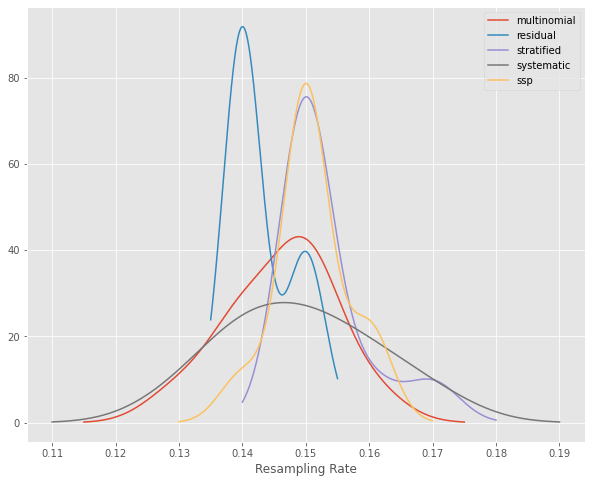

In [16]:
multinomial_run = [r for r in runs[0]]
residual_run = [r for r in runs[1]]
stratified_run = [r for r in runs[2]]
systematic_run = [r for r in runs[3]]
ssp_run = [r for r in runs[4]]

runs = [multinomial_run, residual_run, stratified_run, systematic_run, ssp_run]

rates_list = []
for run in runs:
    rates = list(map(lambda x: sum(np.array(x['output'].summaries.ESSs) < 50) / len(x['output'].summaries.ESSs), run))
    rates_list.append(rates)

import pandas as pd
plt.style.use('ggplot')
pd.DataFrame(rates_list).T.rename(columns=dict(zip(range(5), resamplings))).plot.kde(figsize=(10, 8))
plt.xlabel('Resampling Rate')
plt.ylabel('')
plt.savefig('resampling2.png')

# **Application on Real Data**

Finally, it was decided to test the aforementioned models on real data: the daily number of steps of student Niccolo Diana (3045616) has been measured daily and collected in a csv file.

In [ ]:
#First of all download the true data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('HKQuantityTypeIdentifierStepCount.csv', sep=';')
df['creationdate'] = pd.to_datetime(df['creationdate'])
series = df[['creationdate', 'value']]
df_analysis = series.set_index('creationdate').groupby(pd.Grouper(freq='D')).sum().dropna()
df_analysis.reset_index(inplace=True)
df_analysis['value'] += 1
arr = df_analysis[df_analysis['creationdate']>= pd.to_datetime('2020-07-01',utc=True)].set_index('creationdate')
#data = [np.array(i) for i in arr.values]

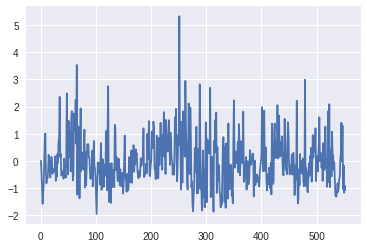

In [ ]:
data = [np.array(i) for i in arr.values]
roll = arr.rolling(40, min_periods=1).mean().to_numpy()
s = np.std(data)
data = (data-roll)/s
plt.plot(data)

In [ ]:
# prior
prior_dict = {'mu': dists.Normal(loc = 0, scale=1), 
              'rho': dists.Uniform(a=-0.8, b=0.8), 
              'sigma':dists.Gamma(10, 13),
              'phi': dists.Gamma(2, 13),
	      'tau':dists.Gamma(10, 13)}

prior = dists.StructDist(prior_dict)

# moment function
def qtiles(W, x):
    alphas = np.linspace(0.05, 0.95, 19)
    return rs.wquantiles_str_array(W, x.theta, alphas=alphas)

# algorithms
N = 15
fks = {}
fk_opts = {'ssm_cls': StepsCount, 'prior': prior,
           'data': data, 'init_Nx': 30, 'smc_options': {'qmc': False}, 'wastefree': False, 'len_chain': 6} 
fks['smc2'] = ssp.SMC2(**fk_opts)
fk_opts['smc_options']['qmc'] = True
fks['smc2_qmc'] = ssp.SMC2(**fk_opts)

# runs
runs = particles.multiSMC(fk=fks, N=N, collect=[Moments(mom_func=qtiles)],
                          verbose=True, store_history=True, nprocs=0, nruns=10)



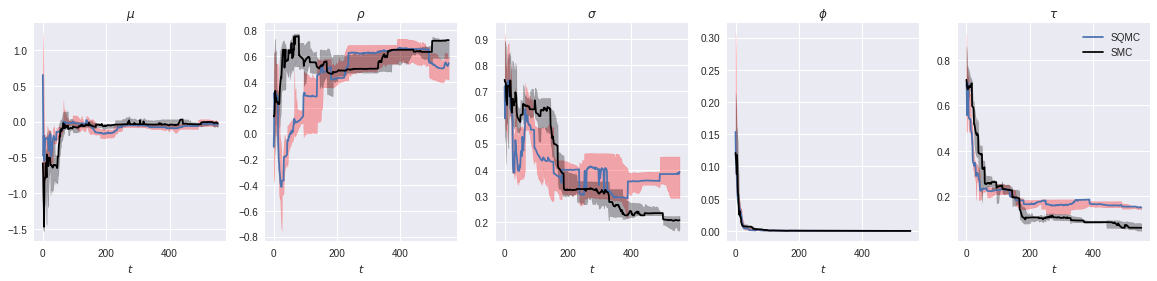

In [ ]:
qmc_run = [r for r in runs if r['fk']=='smc2_qmc'][1]['output']
smc_run = [r for r in runs if r['fk']=='smc2'][1]['output']

T = len(data)
plt.style.use('seaborn')

plt.figure()
for i, p in enumerate(list(prior_dict.keys())):
    plt.subplot(1,5, i + 1)
    q25, q50, q75 = [[qmc_run.summaries.moments[t][p][j] for t in range(T)]
                for j in [5, 10, 15]]
    
    p25, p50, p75 = [[smc_run.summaries.moments[t][p][j] for t in range(T)]
                for j in [5, 10, 15]]
    plt.plot(range(T), q50, label = 'SQMC')
    plt.plot(range(T), p50,'k', label = 'SMC')
    plt.fill_between(range(T), q25, q75, color='red',alpha=0.3)
    plt.fill_between(range(T), p25, p75, color='black',alpha=0.3)
    plt.title(r'$\%s$' % p)
    plt.xlabel(r'$t$')
plt.gcf().set_size_inches(20, 4)
plt.legend()
plt.savefig('new_model')
plt.show()

# Comparison between different Models

# Model selection
SMC^2 enables to compute the marginal likelihood (model evidence) for every $t = 1, \dots,T$. 
This enables to compare the performance of two different models on the same dataset by computing:
$$ \text{log}\left(\frac{p(y_{0:t}|\mathcal{M}_1)}{p(y_{0:t}|\mathcal{M}_2)}\right) \;\;\; \text{ for }t = 1, \dots,T$$

### On real data

In [ ]:

class StepsCount(ssm.StochVol):
    default_params = {'mu': 1.2, 'rho': 0.02, 'sigma': 1.2, 'phi':.15, 'tau': 1.2}

    def PY(self, t, xp, x):
        return dists.Normal(loc=x, scale=np.exp(self.phi * t + self.tau))

In [ ]:
prior_dict = {'mu': dists.Normal(loc = 0, scale=1), 
              'rho': dists.Uniform(a=-0.8, b=0.8), 
              'sigma':dists.Gamma(10, 13),
              'phi': dists.Gamma(2, 13),
	      'tau':dists.Gamma(10, 13)}

prior = dists.StructDist(prior_dict)

In [ ]:
N = 10 ** 1
fks = {}
fk_opts = {'ssm_cls': StepsCount, 'prior': prior,
           'data': data, 'init_Nx': 10, 'smc_options': {'qmc': False}, 
           'ar_to_increase_Nx': 0.1, 'wastefree': False, 'len_chain': 6}
fks['SC'] = ssp.SMC2(**fk_opts)
fk_opts['ssm_cls'] = ssm.StochVol
fks['SV'] = ssp.SMC2(**fk_opts)

In [ ]:
# runs
runs = particles.multiSMC(fk=fks, N=N, verbose=True, store_history=True, nprocs=0, nruns=1)

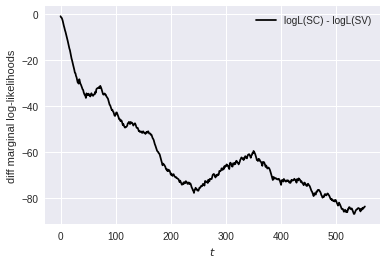

In [ ]:
plt.figure()
evidence_fewNx = np.mean([r['output'].summaries.logLts
                        for r in runs if r['fk']=='SC'], axis=0)
evidence_manyNx = np.mean([r['output'].summaries.logLts
                        for r in runs if r['fk']=='SV'], axis=0)
plt.plot(evidence_fewNx - evidence_manyNx, 'k', label='logL(SC) - logL(SV)')
plt.xlabel(r'$t$')
plt.ylabel('diff marginal log-likelihoods')
plt.legend()
plt.show()

## Discussion on outcomes

StochVol clearly outperforms the Step Model, although it was not built for this specific task. This might be due to the fact that the step model assumes a measurement error growing in time which is in fact absent in our dataset.

Zooming in on the behavior of parameter $\phi$, it can be seen that it converges to 0. This is line with our expectations after having seen the measured data. In fact, there is no sign that the measurement error in the empirical data increases with time as the device obviously could not deteriorate in such a short time frame. 

# References

1. R. Douc and O. Cappe, "Comparison of resampling schemes for particle filtering," ISPA 2005.
2. Chopin, Nicolas, Pierre E. Jacob, and Omiros Papaspiliopoulos. "SMC2: an efficient algorithm for sequential analysis of state space models." Journal of the Royal Statistical Society: Series B (Statistical Methodology) 75.3 (2013): 397-426.
3. Nicolas Chopin & Omiros Papaspiliopoulos. An Introduction to Sequential Monte Carlo, Springer Series in Statistics (2020).